In [26]:
# Librerías principales
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


Carga de datos

In [27]:
ruta_datos = "/TelecomX_Data.json"

df_raw = pd.read_json(ruta_datos)
df_raw.head()


customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df = pd.json_normalize(df_raw.to_dict('records'))
df.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService internet.OnlineSecurity internet.OnlineBackup  \
0                      DSL                      No                   Yes   
1                      DSL                      No                    No   
2              Fiber optic                      No                    No   
3              Fiber optic                      No                   Yes   
4              Fiber optic                      No                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod  account.Charges.Monthly account.Charges.Total  
0          Mailed check                     65.6                 593.3  
1          Mailed check                     59.9                 542.4  
2      Electronic check                     73.9                280.85  
3      Electronic check                     98.0               1237.85  
4          Mailed check                     83.9                 267.4

In [30]:
# Dimensiones
df.shape


(7267, 21)

In [31]:
# Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [32]:
# Valores únicos de Churn
df['Churn'].value_counts(dropna=False)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [33]:
ruta_diccionario = "/TelecomX_Data.json"

with open(ruta_diccionario, "r", encoding="utf-8") as f:
    print(f.read())


[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}},{"customerID":"0004-TLH

In [34]:
df.isnull().sum()


customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [35]:
(df['Churn'] == '').sum()


np.int64(224)

In [36]:
df.duplicated().sum()


np.int64(0)

In [37]:
df = df[df['Churn'] != '']
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [38]:
df['account.Charges.Total'] = pd.to_numeric(
    df['account.Charges.Total'], errors='coerce'
)


In [39]:
df['account.Charges.Total'].isnull().sum()


np.int64(11)

In [40]:
df['account.Charges.Total'].fillna(0, inplace=True)


/tmp/ipython-input-871416482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(0, inplace=True)


In [41]:
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30
df[['account.Charges.Monthly', 'Cuentas_Diarias']].head()


account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667

In [42]:
columnas_binarias = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'account.PaperlessBilling'
]

for col in columnas_binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [43]:
df.rename(columns={
    'customer.tenure': 'Tenure_Meses',
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Charges.Total': 'Cargo_Total',
    'account.Contract': 'Tipo_Contrato'
}, inplace=True)


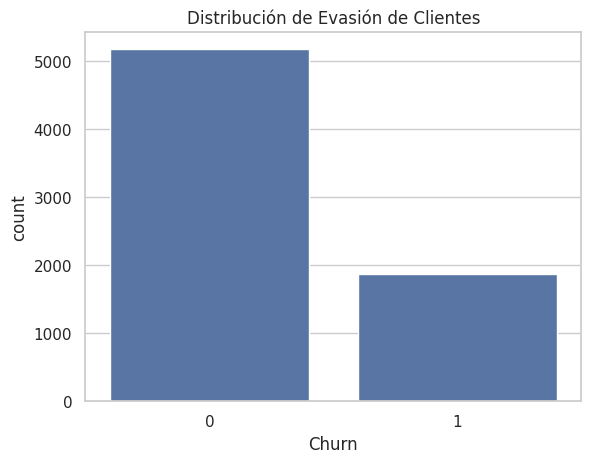

In [44]:
sns.countplot(x='Churn', data=df)
plt.title("Distribución de Evasión de Clientes")
plt.show()


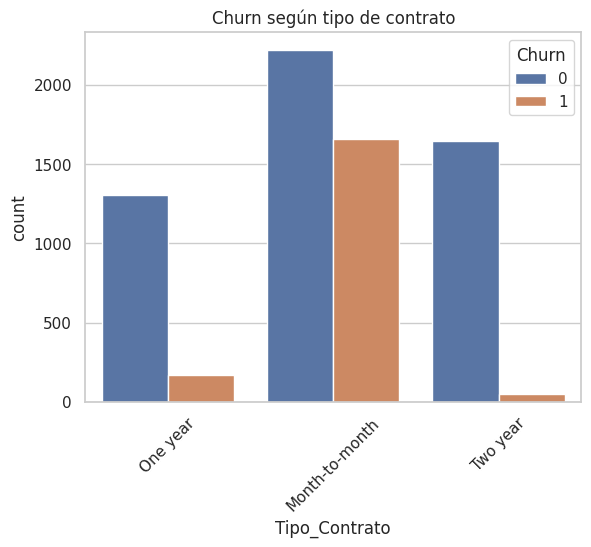

In [45]:
sns.countplot(x='Tipo_Contrato', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title("Churn según tipo de contrato")
plt.show()


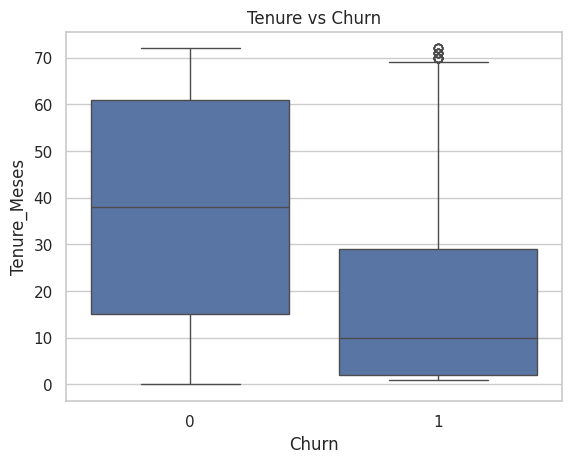

In [46]:
sns.boxplot(x='Churn', y='Tenure_Meses', data=df)
plt.title("Tenure vs Churn")
plt.show()


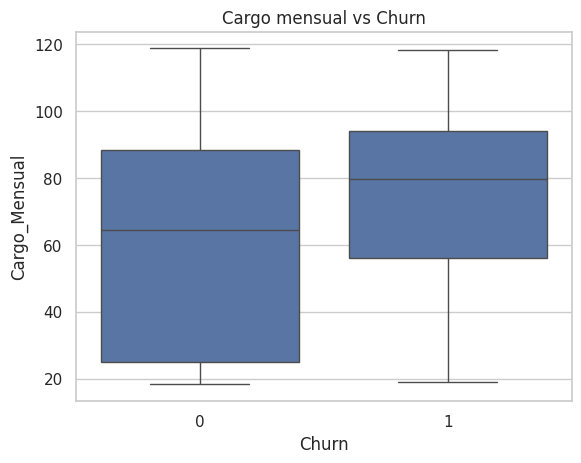

In [47]:
sns.boxplot(x='Churn', y='Cargo_Mensual', data=df)
plt.title("Cargo mensual vs Churn")
plt.show()


In [48]:
df_numerico = df.select_dtypes(include=['int64', 'float64'])
df_numerico.head()


Churn  customer.SeniorCitizen  customer.Partner  customer.Dependents  \
0      0                       0                 1                    1   
1      0                       0                 0                    0   
2      1                       0                 0                    0   
3      1                       1                 1                    0   
4      1                       1                 1                    0   

   Tenure_Meses  phone.PhoneService  account.PaperlessBilling  Cargo_Mensual  \
0             9                   1                         1           65.6   
1             9                   1                         0           59.9   
2             4                   1                         1           73.9   
3            13                   1                         1           98.0   
4             3                   1                         1           83.9   

   Cargo_Total  Cuentas_Diarias  
0       593.30         2.186667  
1       542.40         1.996667  
2       280.85         2.463333  
3      1237.85         3.266667  
4       267.40         2.796667

In [49]:
correlacion = df_numerico.corr()
correlacion


Churn  customer.SeniorCitizen  customer.Partner  \
Churn                     1.000000                0.150889         -0.150448   
customer.SeniorCitizen    0.150889                1.000000          0.016479   
customer.Partner         -0.150448                0.016479          1.000000   
customer.Dependents      -0.164221               -0.211185          0.452676   
Tenure_Meses             -0.352229                0.016567          0.379697   
phone.PhoneService        0.011942                0.008576          0.017706   
account.PaperlessBilling  0.191825                0.156530         -0.014877   
Cargo_Mensual             0.193356                0.220173          0.096848   
Cargo_Total              -0.198324                0.103006          0.317504   
Cuentas_Diarias           0.193356                0.220173          0.096848   

                          customer.Dependents  Tenure_Meses  \
Churn                               -0.164221     -0.352229   
customer.SeniorCitizen              -0.211185      0.016567   
customer.Partner                     0.452676      0.379697   
customer.Dependents                  1.000000      0.159712   
Tenure_Meses                         0.159712      1.000000   
phone.PhoneService                  -0.001762      0.008448   
account.PaperlessBilling            -0.111377      0.006152   
Cargo_Mensual                       -0.113890      0.247900   
Cargo_Total                          0.062078      0.826178   
Cuentas_Diarias                     -0.113890      0.247900   

                          phone.PhoneService  account.PaperlessBilling  \
Churn                               0.011942                  0.191825   
customer.SeniorCitizen              0.008576                  0.156530   
customer.Partner                    0.017706                 -0.014877   
customer.Dependents                -0.001762                 -0.111377   
Tenure_Meses                        0.008448                  0.006152   
phone.PhoneService                  1.000000                  0.016505   
account.PaperlessBilling            0.016505                  1.000000   
Cargo_Mensual                       0.247398                  0.352150   
Cargo_Total                         0.113214                  0.158574   
Cuentas_Diarias                     0.247398                  0.352150   

                          Cargo_Mensual  Cargo_Total  Cuentas_Diarias  
Churn                          0.193356    -0.198324         0.193356  
customer.SeniorCitizen         0.220173     0.103006         0.220173  
customer.Partner               0.096848     0.317504         0.096848  
customer.Dependents           -0.113890     0.062078        -0.113890  
Tenure_Meses                   0.247900     0.826178         0.247900  
phone.PhoneService             0.247398     0.113214         0.247398  
account.PaperlessBilling       0.352150     0.158574         0.352150  
Cargo_Mensual                  1.000000     0.651174         1.000000  
Cargo_Total                    0.651174     1.000000         0.651174  
Cuentas_Diarias                1.000000     0.651174         1.000000

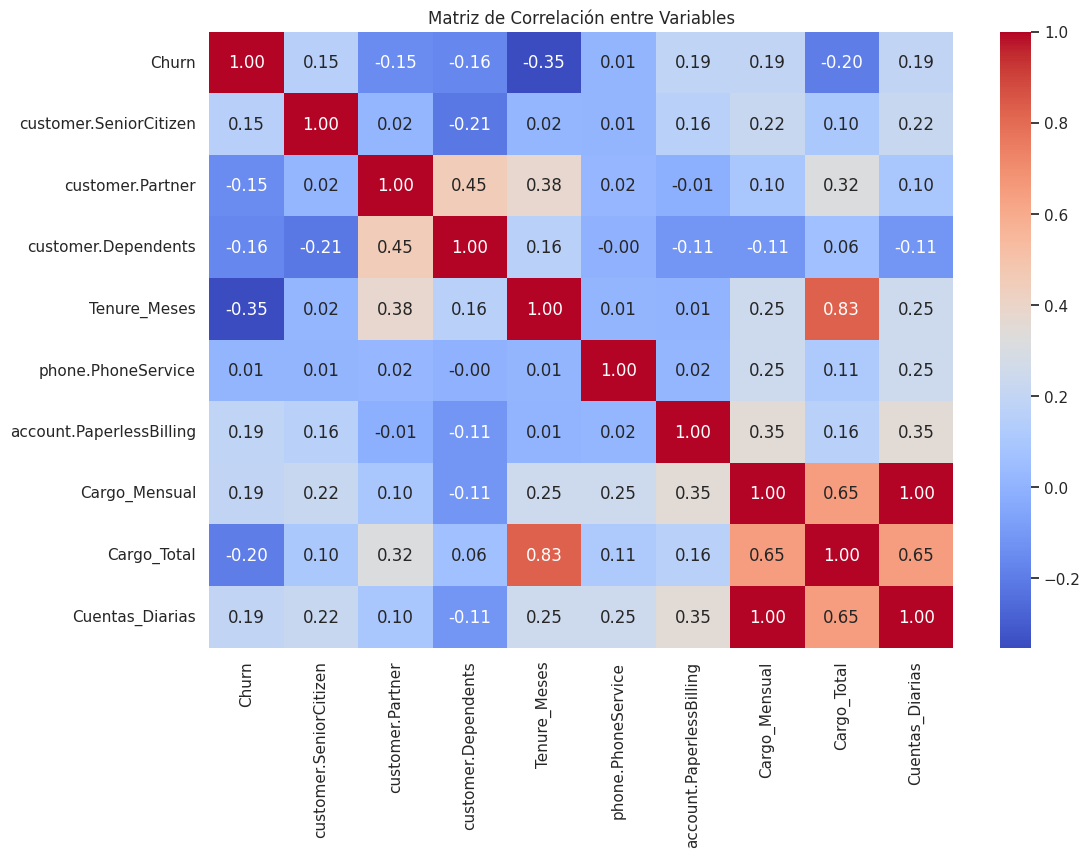

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()


In [51]:
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df)
plt.title("Relación entre Cuentas Diarias y Churn")
plt.show()


In [52]:
sns.scatterplot(
    x='Tenure_Meses',
    y='Cuentas_Diarias',
    hue='Churn',
    data=df,
    alpha=0.6
)
plt.title("Tenure vs Cuentas Diarias según Churn")
plt.show()


In [53]:
servicios = [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

df['Cantidad_Servicios'] = df[servicios].apply(
    lambda x: sum(x == 'Yes'), axis=1
)

df[['Cantidad_Servicios']].head()


Cantidad_Servicios
0                   3
1                   1
2                   1
3                   4
4                   2

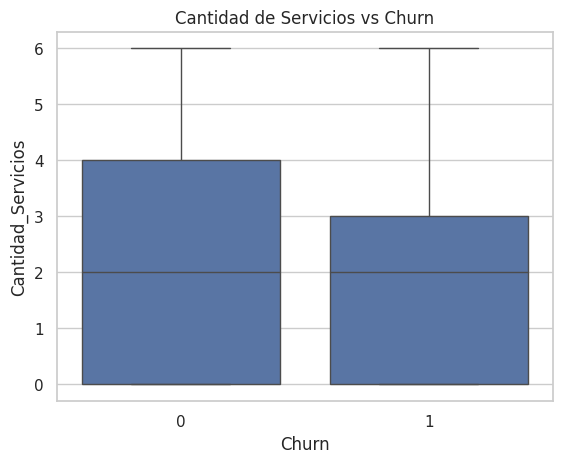

In [54]:
sns.boxplot(x='Churn', y='Cantidad_Servicios', data=df)
plt.title("Cantidad de Servicios vs Churn")
plt.show()


In [55]:
correlacion_churn = correlacion['Churn'].sort_values(ascending=False)
correlacion_churn


Churn                       1.000000
Cargo_Mensual               0.193356
Cuentas_Diarias             0.193356
account.PaperlessBilling    0.191825
customer.SeniorCitizen      0.150889
phone.PhoneService          0.011942
customer.Partner           -0.150448
customer.Dependents        -0.164221
Cargo_Total                -0.198324
Tenure_Meses               -0.352229
Name: Churn, dtype: float64

Presentación de Gráficos

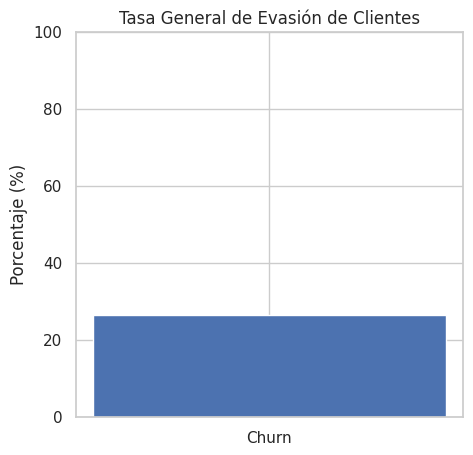

In [56]:
churn_rate = df['Churn'].mean() * 100

plt.figure(figsize=(5,5))
plt.bar(['Churn'], [churn_rate])
plt.ylabel('Porcentaje (%)')
plt.title('Tasa General de Evasión de Clientes')
plt.ylim(0, 100)
plt.show()


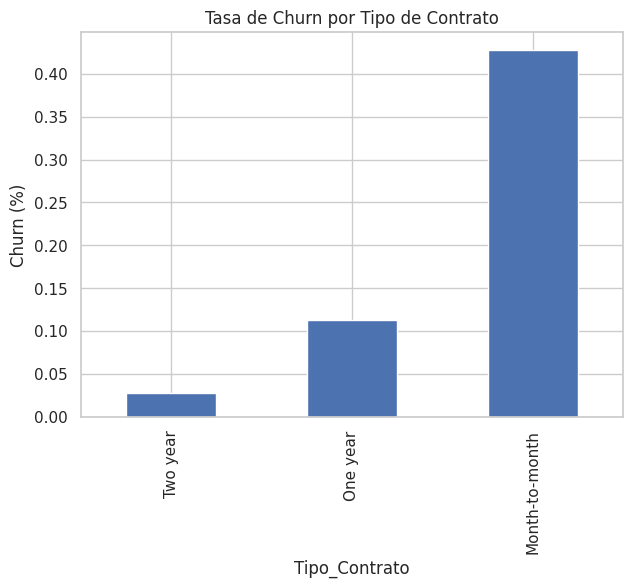

In [57]:
contrato_churn = df.groupby('Tipo_Contrato')['Churn'].mean().sort_values()

contrato_churn.plot(
    kind='bar',
    figsize=(7,5),
    title='Tasa de Churn por Tipo de Contrato',
    ylabel='Churn (%)'
)
plt.show()


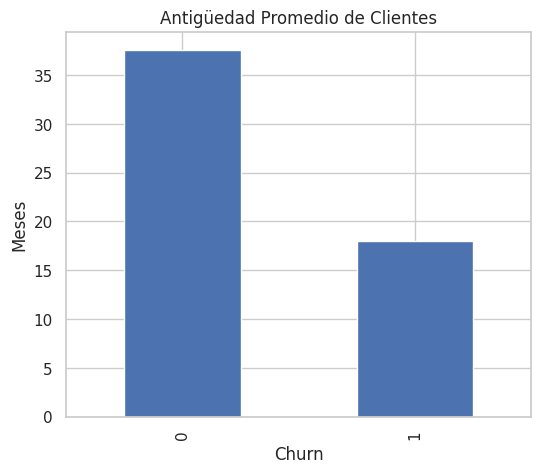

In [58]:
tenure_churn = df.groupby('Churn')['Tenure_Meses'].mean()

tenure_churn.plot(
    kind='bar',
    figsize=(6,5),
    title='Antigüedad Promedio de Clientes',
    ylabel='Meses'
)
plt.show()


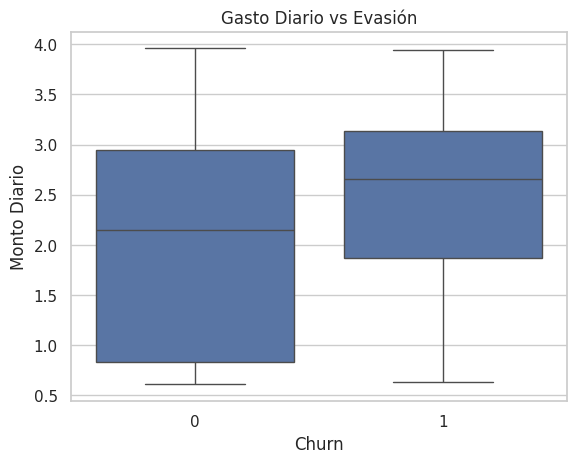

In [59]:
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df)
plt.title('Gasto Diario vs Evasión')
plt.ylabel('Monto Diario')
plt.show()


In [60]:
servicios_churn = df.groupby('Churn')['Cantidad_Servicios'].mean()

servicios_churn.plot(
    kind='bar',
    figsize=(6,5),
    title='Cantidad Promedio de Servicios Contratados',
    ylabel='Servicios'
)
plt.show()
